# Biopython 2: AlignIO and BLAST 

In this session of the workshop, we will be exploring Biopython's alignment utilities. Namely, using the Align and AlignIO module to generate alignments and read and write alignment files (analogously to usign SeqIO for sequence files), and generating alignments using the NCBI BLAST utility through Biopython's Blast.NCBIWWW and SearchIO modules. 

### Load your Python Environment

Remember that you will need to be using an environment with biopython installed for this workshop!

## A 3 Second Alignment Primer

"In bioinformatics, a sequence alignment is a way of arranging the sequences of DNA, RNA, or protein to identify regions of similarity that may be a consequence of functional, structural, or evolutionary relationships between the sequences"

\- Wikipedia

## Multiple Sequence Alignment Objects

The `MultipleSeqAlignment` class is how we deal with multiple sequence alignments. A `MultipleSeqAlignment` object is essentially just a collection of sequences which have been padded by gap characters so that they are all the same length. Then, they can be thought of as a matrix of letters. You can generate these objects by reading in data from an alignment file (which we will do later on) or by manually building one from SeqRecord objects. You can find the documentation in the [Bio.Align package](https://biopython.org/docs/latest/api/Bio.Align.html).

In [58]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

a = SeqRecord(Seq("AAAACGT"), id="Alpha")
b = SeqRecord(Seq("AAA-CGT"), id="Beta" )
c = SeqRecord(Seq("AAAAGGT"), id="Gamma")
d = SeqRecord(Seq("AAAAGGT"), id="Delta")
e = SeqRecord(Seq("ATATCGT"), id="Epsilon")

align = MultipleSeqAlignment([a, b, c], annotations={"tool": "demo"}, column_annotations={"stats": "CCCXCCC"})

print(align)

Alignment with 3 rows and 7 columns
AAAACGT Alpha
AAA-CGT Beta
AAAAGGT Gamma


### Manipulating MultipleSeqAlignment Objects

- You can add another row/sequence to your alignment using the `extend()` function.
- You can also use indexing to isolate sequences within the MultipleSeqAlignment object. 
- Append two MSAs together using `append()`

In [59]:
# Extend the alignment (add rows)
align.extend([d, e])
print(align)

# Isolate sequences and letters within sequences
print(align[1])
print(type(align[1]))
print(align[1].id)

print(align[3][2:4])

# Combine alignments (add columns)
align_a = MultipleSeqAlignment([a, b], annotations={"tool": "demo"}, column_annotations={"stats": "CCCXCCC"})
align_b = MultipleSeqAlignment([c, d], annotations={"tool": "demo"}, column_annotations={"stats": "CCCXCCC"})

align_new = align_a + align_b
print(align_new)

Alignment with 5 rows and 7 columns
AAAACGT Alpha
AAA-CGT Beta
AAAAGGT Gamma
AAAAGGT Delta
ATATCGT Epsilon
ID: Beta
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('AAA-CGT')
<class 'Bio.SeqRecord.SeqRecord'>
Beta
ID: Delta
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('AA')
Alignment with 2 rows and 14 columns
AAAACGTAAAAGGT <unknown id>
AAA-CGTAAAAGGT <unknown id>


## Pairwise Alignments

You can do pairwise alignments in Biopython using the [`Bio.Align`](https://biopython.org/docs/1.75/api/Bio.Align.html) package. 

You can use the `PairwiseAligner()` class to create an "aligner" and specify the various parameters for your alignment. Then, use `align()` with two sequences as the arguments to return the alignments of the two sequences. Using `score` will return the alignment score based on the alignment parameters you have set. We will go through an example of this below.

In [75]:
from Bio import Align

aligner = Align.PairwiseAligner() # Create PairwiseAligner object
print(aligner) # Look at all the possible parameters

# Specify parameters
aligner.mode = "global" # "global" or "local"
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1
aligner.target_end_gap_score = 0.0
aligner.query_end_gap_score = 0.0

seq1 = "ACTGATC"
seq2 = "CAGAGC"

alignments = aligner.align(seq1, seq2)
print(type(alignments))

for alignment in sorted(alignments):
    print(type(alignment))
    print(alignment)



Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

<class 'Bio.Align.PairwiseAlignments'>
<class 'Bio.Align.Alignment'>
target            0 -ACTGA-TC 7
                  0 -|--||--| 9
query             0 CA--GAG-C 6

<class 'Bio.Align.Alignment'>
target            0 -ACTGAT-C 7
                  0 -|--||--| 9
query             0 CA--GA-GC 6

<class 'Bio.Align.Alignment'>
target            0 -ACTGATC 7
                  0 -|--||

You can also use pre-defined [substitution matrices](https://biopython.org/docs/dev/api/Bio.Align.substitution_matrices.html). The available matrices are: 'BENNER22', 'BENNER6', 'BENNER74', 'BLASTN', 'BLASTP', 'BLOSUM45', 'BLOSUM50', 'BLOSUM62', 'BLOSUM80', 'BLOSUM90', 'DAYHOFF', 'FENG', 'GENETIC', 'GONNET1992', 'HOXD70', 'JOHNSON', 'JONES', 'LEVIN', 'MCLACHLAN', 'MDM78', 'MEGABLAST', 'NUC.4.4', 'PAM250', 'PAM30', 'PAM70', 'RAO', 'RISLER', 'SCHNEIDER', 'STR', and 'TRANS'.

In [18]:
from Bio.Align import substitution_matrices

aligner = Align.PairwiseAligner()
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")

seq1 = "ACTGATC"
seq2 = "CAGAGC"

alignments = aligner.align(seq1, seq2)

print("Total alignments: {}".format(len(alignments)))
for alignment in sorted(alignments):
    print(alignment)
    print(alignment.score)

Total alignments: 5
target            0 AC-T-GATC 7
                  0 -|---|--| 9
query             0 -CA-AG--C 5

24.0
target            0 AC-TGATC 7
                  0 -|-.|--| 8
query             0 -CAAG--C 5

24.0
target            0 AC--TGATC 7
                  0 -|---|--| 9
query             0 -CAA-G--C 5

24.0
target            0 ACT--GATC 7
                  0 -|---|--| 9
query             0 -C-AAG--C 5

24.0
target            0 ACT-GATC 7
                  0 -|.-|--| 8
query             0 -CAAG--C 5

24.0


## Alignment File Types

The following are the alignment file types supported by Biopython's AlignIO module.

| Format Name          | File Extension(s) | Description                                                                                                                             |
|----------------------|-------------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| Clustal              | `.aln`            | Output from Clustal W or X. See also the module Bio.Clustalw which can be used to run the command-line tool from Biopython.            |
| Emboss               | No standard       | EMBOSS tools’ “pairs” and “simple” alignment formats.                                                                                   |
| Fasta                | `.fasta`, `.fa`   | The generic sequence file format where each record starts with an identifier line starting with a “>” character, followed by lines of sequence. |
| Fasta-m10            | `.m10`            | For the pairwise alignments output by Bill Pearson’s FASTA tools when used with the -m 10 command-line option for machine-readable output. |
| Ig                   | No standard       | The IntelliGenetics file format, apparently the same as the MASE alignment format.                                                     |
| Msf                  | `.msf`            | The GCG MSF alignment format, originally from the PileUp tool.                                                                          |
| Nexus                | `.nex`, `.nxs`    | Output from NEXUS. See also the module Bio.Nexus which can also read any phylogenetic trees in these files.                           |
| Phylip               | `.phy`            | Interlaced PHYLIP, as used by the PHYLIP tools.                                                                                         |
| Phylip-sequential    | `.phy`            | Sequential PHYLIP.                                                                                                                      |
| Phylip-relaxed       | `.phy`            | PHYLIP-like format allowing longer names.                                                                                              |
| Stockholm            | `.sth`, `.sto`    | A richly annotated alignment file format used by PFAM.                                                                                  |
| Mauve                | No standard       | Output from progressiveMauve/Mauve.                                                                                                     |

Note: If you are dealing with SAM/BAM alignment files, you can use the [pysam](https://pysam.readthedocs.io/en/latest/) package, which also interfaces with samtools. 

## Reading and Parsing Alignment Files

We can read and parse alignment files in the same way as with sequence files, instead using the [AlignIO module](https://biopython.org/wiki/AlignIO). There are a few different options here:
- For files with only a single alignment, you can use `read()`, which returns the alignment as a `MultipleSeqAlignment` object.
- For files with multiple alignments, use `parse()`, similar to a sequence data file, which returns an iterator which can be used to access the `MultipleSeqAlignment` objects, as seen previously with sequence data.

Both functions take the file path and the file type as arguments. 

In [78]:
from Bio import AlignIO
import gzip  

# Get the alignment from a data file with one alignment
first_alignment = AlignIO.read("sample-data/sample-alignment.sth", "stockholm")
print(first_alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


## Large Files and Uneven Sequence Lengths

Note that the AlignIO package will only deal with alignments where all the sequences have the same length. Let's look at a file that does not have consistent sequence lengths, taken from SRA, and pad the alignments so that they can be read. You can download the file [here](https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR1427467&display=alignment). Here, this file also has only one alignment, but we use the correct technique for multiple alignments as a demonstration.

In [3]:
from Bio import SeqIO, Seq

# Get alignments from a data file with multiple alignments
count = 0
max_length = 0
max_ID = None

#First try opening using AlignIO - it will not work.
with gzip.open("sample-data/SRR1427467_chr7.fasta.gz", "rt") as handle:
    for record in AlignIO.parse(handle, "fasta"):
        count += 1

# Find the maximum sequence length
with gzip.open("sample-data/SRR1427467_chr7.fasta.gz", "rt") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if len(record.seq) > max_length:
            max_length = len(record)
            max_ID = record.id

print("max length calculated")
print(max_length)
print(max_ID)

with gzip.open("sample-data/SRR1427467_chr7.fasta.gz", "rt") as handle:
    with gzip.open("sample-data/SRR1427467_chr7_padded.fasta.gz", "wt") as output_handle:
        for record in SeqIO.parse(handle, "fasta"):
            if len(record) < max_length:
                new_sequence = str(record.seq).ljust(max_length, ".")
                record.seq = Seq.Seq(new_sequence)
            SeqIO.write(record, output_handle, "fasta")

with gzip.open("sample-data/SRR1427467_chr7_padded.fasta.gz", "rt") as handle:
    for record in AlignIO.parse(handle, "fasta"):
        count += 1


max length calculated
51
SRR1427467.110354044/1
This dataset contains 1 alignments


## Changing File Formats

Let's say we want to convert file formats for alignment. We can use the `convert()` function, which takes the input and putput file paths and formats. 

In [79]:
with open("sample-data/SEED.sth", "r") as handle:
    for alignment in AlignIO.parse(handle, "stockholm"):
        print(alignment)


AlignIO.convert(in_file = "sample-data/SEED.sth", in_format = "stockholm", out_file = "sample-data/SEED-clustal.aln", out_format = "clustal")

with open("sample-data/SEED-clustal.aln", "r") as handle:
    for alignment in AlignIO.parse(handle, "clustal"):
        print(alignment)


Alignment with 15 rows and 389 columns
YLFFILDK-NSPEP-YGSIKRVCNTMLGVPSQCAISKHILQS--...QDV AGO1_SCHPO/500-799
FILCILPERKTSDI-YGPWKKICLTEEGIHTQCICPIKI-----...FTK AGO6_ARATH/541-851
FILCVLPDKKNSDL-YGPWKKKNLTEFGIVTQCMAPTRQPND--...FMK AGO4_ARATH/577-885
CIIVVLQS-KNSDI-YMTVKEQSDIVHGIMSQCVLMKNVSRP--...HVK TAG76_CAEEL/660-966
LIVVVLPG--KTPI-YAEVKRVGDTVLGIATQCVQAKNAIRT--...HLV O16720_CAEEL/566-867
TFVFIITD-DSITT-LHQRYKMIEKDTKMIVQDMKLSKALSV--...LWN WAGO4_CAEEL/594-924
DILVGIAR-EKKPD-VHDILKYFEESIGLQTIQLCQQTVDKMMG...NYK YQ53_CAEEL/650-977
TIVFGIIA-EKRPD-MHDILKYFEEKLGQQTIQISSETADKFMR...NYK NRDE3_CAEEL/673-1001
GIMLVLPE-YNTPL-YYKLKSYLINS--IPSQFMRYDILSNRNL...VNR PIWI_ARCFU/110-406
CFALIIGKEKYKDNDYYEILKKQLFDLKIISQNILWENWRKDDK...NWK AGO_METJA/426-699
LVIVFLEEYPKVDP-YKSFLLYDFVKRELLKKMIPSQVILNRTL...GIE O67434_AQUAE/419-694
IVVCLLSS-NRKDK-YDAIKKYLCTDCPTPSQCVVARTLGKQQT...SIH PIWL1_HUMAN/555-847
IVMVVMRS-PNEEK-YSCIKKRTCVDRPVPSQVVTLKVIAPRQQ...SIN AUB_DROME/555-852
LILCLVPN-DNAER-YSSIKKRGYVDRAVPTQVVTLKTTKNRSL

We can also do this manually by reading and writing the data file, as we did for sequences. As an exercise after this workshop, try it for yourself!

In [ ]:
# Try doing the manual file conversion here, by parsing the file and then writing to a new 
# file using the AlignIO.write() function

## NCBI BLAST

NCBI BLAST is a widely used bioinformatics tool developed by the National Center for Biotechnology Information (NCBI). It quickly compares biological sequences against a vast database to identify similar regions. BLAST offers various search algorithms tailored to nucleotide or protein sequences, including BLASTn for nucleotides and BLASTp for proteins. Users can customize parameters and filter results. NCBI BLAST is available online and as standalone software, making it essential for tasks like genome annotation, sequence similarity analysis, and evolutionary studies. 

You can run BLAST locally on your own machine, or remotely on the NCBI servers. We will start with using Biopython to run the online BLAST service with the Bio.Blast module. There is also a Bio.SearchIO module, which is in development but not yet stable. 

### Online vs Local BLAST

You will have the option to run BLAST either online (using the NCBI servers) or locally. There are advantages and disadvantages to each:

Local BLAST
- Pro: Usually faster than running over the internet
- Pro: Customize your database (add your own sequences, etc.)
- Pro: Use query sequences that you can't submit to online BLAST for proprietary reasons
- Con: You will need to install some command line tools 
- Con: You will need to set up your database, which can be very large

For more information on this, check Section 7.2 of the Official Biopython Tutorial.

### BLAST Etiquette 

You can view the NCBI's guidelines for running BLAST online [here](https://blast.ncbi.nlm.nih.gov/doc/blast-help/developerinfo.html#developerinfo). They are summed up as the following:

- Do not contact the server more often than once every 10 seconds.
- Do not poll for any single RID more often than once a minute.
- Use the URL parameter email and tool, so that the NCBI can contact you if there is a problem. (done by setting the `NCBIWWW.email` variable)
- Run scripts weekends or between 9 pm and 5 am Eastern time on weekdays if more than 50 searches will be submitted.

## Accessing BLAST

To access BLAST online, we will use the `qblast()` function. Take a look at the documentation [here](https://biopython.org/docs/latest/api/Bio.Blast.NCBIWWW.html). Let's try a sample usage case of the function, when the query sequence has a GI number already.

```
from Bio.Blast import NCBIWWW
NCBIWWW.email = "cwarner@rockefeller.edu"
result_handle = NCBIWWW.qblast("blastn", "nt", "8332116")
with open("blast-data/my_blast.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
result_handle.close()
```

You can also supply your query sequence from a sequence data file. For example:

```
record = SeqIO.read("sequence-data.fasta", format="fasta")
result_handle = NCBIWWW.qblast("blastn", "nt", record.format("fasta"))
```

The first example returned an XML file containing the alignments and other data about the search results. Open the XML file to see what it contains. 

### XML Data from BLAST

Note that you can get your BLAST results returned in several formats (XML, HTML, etc.). The Biopython developers recommend using XML format, as it is more stable and easier to parse.

## Example BLAST Query

Below, let's do an example where we take a sequence from a FASTA sequence file and use it to query BLAST. To make this go faster, we will only return one result (it should take around one minute). 


In [74]:
from Bio.Blast import NCBIWWW
from Bio import SeqIO

NCBIWWW.email = "cwarner@rockefeller.edu"

my_dictionary = SeqIO.index("sample-data/ls_orchid.fasta", format="fasta")
my_sequence = my_dictionary["gi|2765658|emb|Z78533.1|CIZ78533"].seq


result_handle = NCBIWWW.qblast("blastn", "nt", my_sequence, hitlist_size = 1)
with open("blast-data/blast_ladyslipper.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
result_handle.close()



## Parsing XML BLAST Results

You can parse the XML results from a BLAST query by using `NCBIXML.read()` (returns a BLAST record object) or `NCBIXML.parse()` (returns an iterator). Use parse() if you had multiple query sequences, consistent with what we have discussed previously, or if you have a large number of results that you would like to iterate through individually, to save on memory.

Once you have read or parsed the file, you can look at the individual alignments and extract the contained information like so. Below, you can consult the Blast Record class diagram to see how the information is extracted.

In [63]:
from Bio.Blast import NCBIXML

result_handle = open("blast-data/my_blast.xml")

blast_record =  NCBIXML.read(result_handle)

for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        print(type(hsp))
        print(alignment.title)
        print("Length: ", alignment.length)
        print("e value:", hsp.expect)
        print(hsp.query[0:75] + "...")
        print(hsp.match[0:75] + "...")
        print(hsp.sbjct[0:75] + "...")



<class 'Bio.Blast.Record.HSP'>
gi|1219041180|ref|XM_021875076.1| PREDICTED: Chenopodium quinoa cold-regulated 413 plasma membrane protein 2-like (LOC110697660), mRNA
Length:  1173
e value: 1.00795e-116
ACAGAAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTC...
|| ||||||||| |||| | |||| ||  |||| |||| | |||| ||| | |||| ||| ||| ||||| | ||...
ACCGAAAATGGGCAGAGGAGTGAATTATATGGCAATGACACCTGAGCAACTAGCCGCGGCCAATTTGATCAACTC...
<class 'Bio.Blast.Record.HSP'>
gi|2514617377|ref|XM_021992092.2| PREDICTED: Spinacia oleracea cold-regulated 413 plasma membrane protein 2-like (LOC110787470), mRNA
Length:  752
e value: 2.70471e-111
AAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTCCGAT...
|||||||| |||  |||| | || ||||| |||||||| || ||||| |||| ||| ||| ||||||||||||||...
AAAATGGGTAGACGAATGGATTATTTGGCGATGAAAACCGAGCAATTAGCCGCGGCCAATTTGATCGATTCCGAT...
<class 'Bio.Blast.Record.HSP'>
gi|2518612504|ref|XM_010682658.3| PREDICTED: Beta vulgaris subsp. vulgaris cold-regulated 413

### The BLAST Record Class

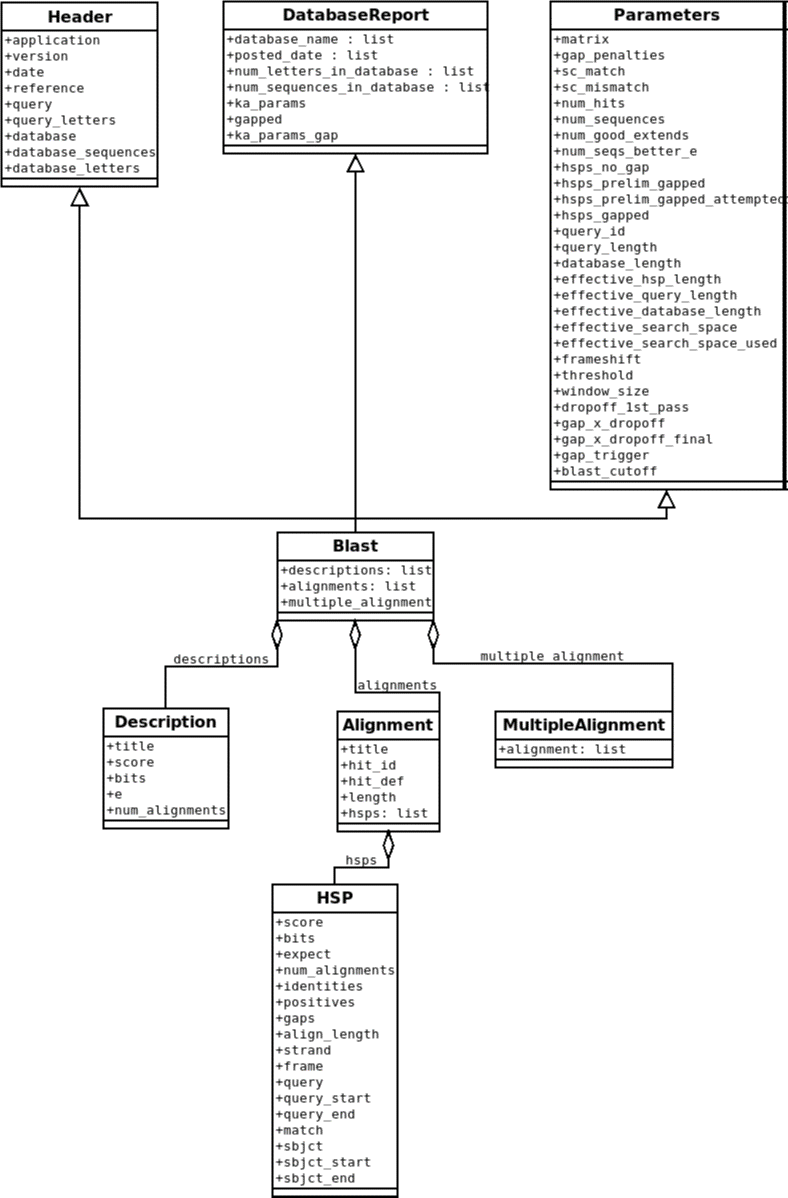
From the Official Biopython Tutorial, Figure 7.1

### A Fun Exercise

Below is a function that will take in any string and clean it so that only the letters A C T and G remain, turning it into a DNA sequence. Type any sentence you like and run a hitlist_size = 1 BLAST search to find out which organism/sequence best matches your sentence! 

In [93]:
# Generate your string here
import re

def clean_dna_string(input_string):
    cleaned_string = re.sub(r'[^ACTG]', '', input_string.upper())
    return cleaned_string

my_string = "Her name is Noelle, I have a dream about her, She rings my bell, I got gym class in half an hour, Oh, how she rocks, In Keds and tube socks, But she doesn't know who I am, And she doesn't give a damn about me, 'Cause I'm just a teenage dirtbag, baby, Yeah, I'm just a teenage dirtbag, baby, Listen to Iron Maiden, baby, with me, ooh"

my_sequence = clean_dna_string(my_string)

print(my_sequence)

AAAAATGGTGCAAACATCTTAATGAAATCATATAGTAGAATATAGTAGATTAAT


In [81]:
# Do your BLAST query (run this 1x only)
from Bio.Blast import NCBIWWW

NCBIWWW.email = "cwarner@rockefeller.edu"

result_handle = NCBIWWW.qblast("blastn", "nt", my_sequence, hitlist_size = 1)
with open("blast-data/teenage_dirtbag.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
result_handle.close()

In [92]:
# Extract information from your results

result_handle = open("blast-data/teenage_dirtbag.xml")

blast_record =  NCBIXML.read(result_handle)

print(blast_record.alignments[0])
print(blast_record.alignments[0].hsps[0].expect)


gi|2621781025|emb|OY782963.1| Mytilus edulis genome assembly, chromosome: 8
           Length = 90587198

0.308307


Turns out that Blue Mussel DNA matches the lyrics of Teenage Dirtbag better than random (which would return an E value of 1)!  

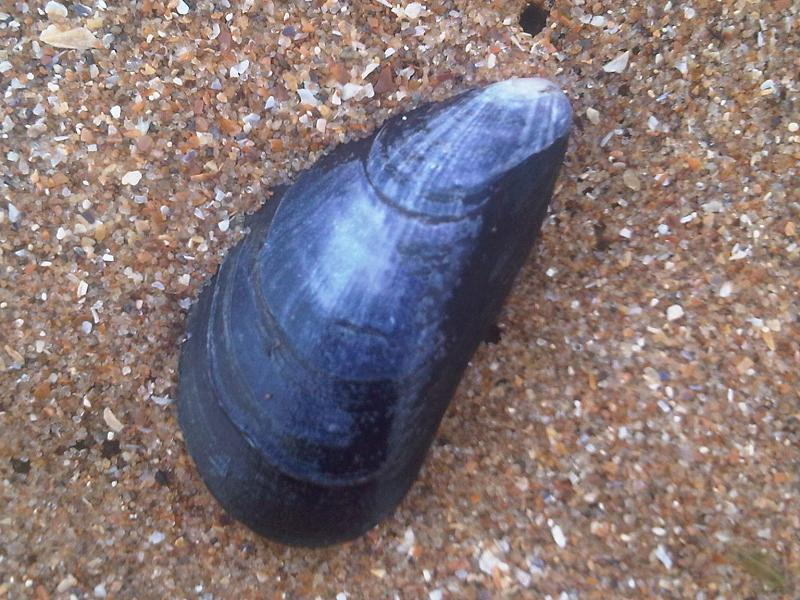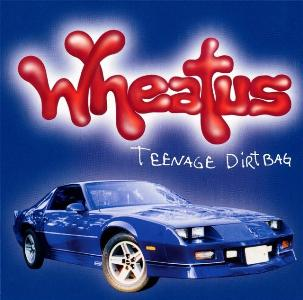

## Useful Links and Documentation

* [Biopython Documentation](https://biopython.org/wiki/Documentation)
* [Align](https://biopython.org/docs/latest/api/Bio.Align.html)
* [AlignIO](https://biopython.org/docs/latest/api/Bio.AlignIO.html)
* [Blast.NCBIWWW](https://biopython.org/docs/latest/api/Bio.Blast.NCBIWWW.html)
* [NCBI BLAST Common URL API](https://ncbi.github.io/blast-cloud/dev/api.html)

## Credits and Inspiration

* [Biopython Tutorial and Cookbook](https://biopython.org/DIST/docs/tutorial/Tutorial.html)
* [Lana Dominkovic's Biopython Tutorials](https://github.com/lanadominkovic/12-days-of-biopython) (also check out her [YouTube channel](https://www.youtube.com/@LanaDominkovic))
